### Data Processing

In [1]:
from scipy.io import loadmat
import scipy.io
import numpy as np
from sklearn import preprocessing
import torch
from torch import nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
os.chdir("/home/st122388/work/dsai project")

### visualizing preprocessed EEG Samples and shape

In [3]:
annots =  scipy.io.loadmat('seed/Preprocessed_EEG/1_20131027.mat')
annots.keys()


dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15'])

In [4]:
type(annots['djc_eeg1']),annots['djc_eeg1'].shape #type and shape of eeg data

(numpy.ndarray, (62, 47001))

### EEG1 plot which is already downsampled and in frequency domain

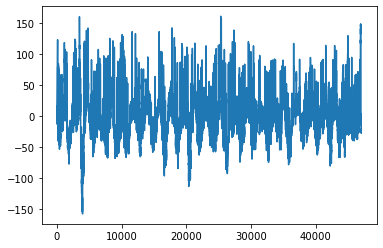

In [5]:
plt.plot(annots['djc_eeg1'][1,:])
plt.show()

### Since in the paper we need differential entrophy features and the datasets SEED which was provided has preprocessd datsets and features extracted datasets. We used Features Extracted Datasets for this work

In [6]:
os.chdir('/home/st122388/work/dsai project/seed/ExtractedFeatures')

# Get a list for .mat files in current folder
mat_files = glob.glob('*.mat')
label = scipy.io.loadmat('label.mat')
mat_files.remove('label.mat')
mat_files_1 = [x for x in mat_files if len(x.split("_")) == 2] 
mat_files_1.sort(key = lambda x : int(x.split("_")[0]))

# List for stroring all the data
alldata = []
# Iterate mat files
for fname in mat_files_1:
    # Load mat file data into data.
    data = loadmat(fname)
    
    # Append data to the list
    alldata.append(data)
    

In [7]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movingAve6', 'de_LDS6

In [8]:
data['de_LDS1'].shape

(62, 235, 5)

In [9]:
os.chdir('/home/st122388/work/dsai project')
columns = pd.read_excel('seed/channel-order.xlsx',header=None)
df_list = columns.T.values.tolist()

In [10]:
data_1_1 = scipy.io.loadmat("seed/ExtractedFeatures/1_20131027.mat")

In [11]:
label_data =loadmat("seed/ExtractedFeatures/label.mat")
label = label_data['label']
label = label.reshape(15,)
label += 1


In [12]:
de_1_1 = []
for i in range(1, 16):
    de_1_1.append(data_1_1['de_LDS' + str(i)])

In [13]:
len(de_1_1)

15

In [14]:
de_1_1_1 = pd.DataFrame(np.array(de_1_1[1][:,:,4]).T,columns=df_list)
de_1_1_1

,FP1,FPZ,FP2,AF3,AF4,F7,F5,F3,F1,FZ,...,PO3,POZ,PO4,PO6,PO8,CB1,O1,OZ,O2,CB2
0,16.321799,16.349038,17.628318,15.786498,16.499615,24.999267,16.135865,15.637137,15.427287,15.011732,...,16.208599,15.567229,15.591404,34.080594,16.593486,18.181221,17.799844,16.797631,16.149875,16.274071
1,16.320485,16.348221,17.627077,15.786358,16.497482,24.996706,16.136662,15.637165,15.427073,15.010902,...,16.208999,15.567917,15.592428,34.077694,16.595417,18.181815,17.800621,16.797784,16.150886,16.275114
2,16.319542,16.347175,17.625874,15.787071,16.495080,24.994424,16.138010,15.638677,15.427371,15.010715,...,16.209414,15.568421,15.592745,34.074293,16.596280,18.182809,17.801498,16.798163,16.151321,16.276002
3,16.317654,16.345698,17.624445,15.787162,16.492249,24.991948,16.139073,15.639345,15.427457,15.010086,...,16.209238,15.568091,15.592194,34.070284,16.595174,18.182698,17.801277,16.797880,16.151141,16.275940
4,16.314805,16.343662,17.623075,15.786447,16.489451,24.989954,16.139744,15.639402,15.427397,15.008763,...,16.208440,15.567549,15.591418,34.065605,16.593156,18.182075,17.800546,16.797387,16.150713,16.275443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,16.651671,16.592449,17.973199,15.857479,16.709198,25.539646,16.035937,15.556104,15.411796,15.001453,...,16.060899,15.354053,15.307884,33.656078,16.124087,18.063419,17.663508,16.754186,15.858928,16.048917
229,16.654200,16.593917,17.975136,15.860135,16.712268,25.539091,16.038060,15.557927,15.412726,15.003112,...,16.063209,15.356620,15.310035,33.659411,16.126720,18.066603,17.666368,16.757452,15.861440,16.051965
230,16.655977,16.595278,17.976392,15.861788,16.714565,25.539162,16.039261,15.558963,15.412959,15.004138,...,16.065705,15.358822,15.312347,33.661959,16.129459,18.069466,17.669147,16.760438,15.864085,16.054410
231,16.657250,16.596418,17.976415,15.863153,16.715678,25.538854,16.040203,15.560164,15.412679,15.004557,...,16.067600,15.360841,15.314449,33.663454,16.132100,18.071700,17.671373,16.762481,15.866571,16.056757


### Frequency plot of Differential Entrophy linear dynamical system(LDS)

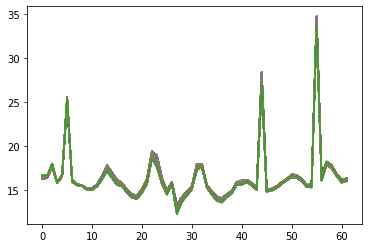

In [15]:
plt.plot(de_1_1[1][:,:,4])
plt.show()

# Main Data Processing for Differential entrophy feature

### SetData and Window_slice function is created to slice the datsets to create a time sequence of 9s  for temporal dependencies

In [16]:

def window_slice(data, time_steps):   
    data_ = data.copy()
    data_ = np.transpose(data_, (1, 0, 2)).reshape(-1, 310) # (n, 310)
    
    data_st = data_.reshape(data_.shape[0] * data_.shape[1], ) #(n*310, )
    data_st = preprocessing.scale(data_st)
    data_st += 0.5
    data_ = data_st.reshape(data_.shape[0], data_.shape[1]) #(n, 310)
    
    xs = []
    for i in range(int(data_.shape[0] / time_steps)):
        k = i*time_steps
        xs.append(data_[k: k + time_steps, :])
    
    xs = np.concatenate(xs).reshape((len(xs), -1, 310))
    return xs

def setData(de_, label_data, time_steps=9):
    X = []
    y = []   

    for data, label_ in zip(de_, list(label_data)):
        X.append(window_slice(data, time_steps))
        y_np = np.array([label_] * len(X[-1]))
        y.append(y_np)
    
    
    return X, y 


###  mkdata function load the matfile of 15 subject with labels and we extract the diffferential entrophy LDS features for our work  with output of EEG data and labels of time sequence of 9s which is the X and y data for our input


In [17]:
def mkdata():
    data_1_1 = scipy.io.loadmat("seed/ExtractedFeatures/1_20131027.mat")
    data_2_1 = scipy.io.loadmat("seed/ExtractedFeatures/2_20140404.mat")
    data_3_1 = scipy.io.loadmat("seed/ExtractedFeatures/3_20140603.mat")
    data_4_1 = scipy.io.loadmat("seed/ExtractedFeatures/4_20140621.mat")
    data_5_1 = scipy.io.loadmat("seed/ExtractedFeatures/5_20140411.mat")
    data_6_1 = scipy.io.loadmat("seed/ExtractedFeatures/6_20130712.mat")
    data_7_1 = scipy.io.loadmat("seed/ExtractedFeatures/7_20131027.mat")
    data_8_1 = scipy.io.loadmat("seed/ExtractedFeatures/8_20140511.mat")
    data_9_1 = scipy.io.loadmat("seed/ExtractedFeatures/9_20140620.mat")
    data_10_1 = scipy.io.loadmat("seed/ExtractedFeatures/10_20131130.mat")
    data_11_1 = scipy.io.loadmat("seed/ExtractedFeatures/11_20140618.mat")
    data_12_1 = scipy.io.loadmat("seed/ExtractedFeatures/12_20131127.mat")
    data_13_1 = scipy.io.loadmat("seed/ExtractedFeatures/13_20140527.mat")
    data_14_1 = scipy.io.loadmat("seed/ExtractedFeatures/14_20140601.mat")
    data_15_1 = scipy.io.loadmat("seed/ExtractedFeatures/15_20130709.mat")

    label_data = scipy.io.loadmat(r"seed/ExtractedFeatures/label.mat")
    label = label_data['label']
    label = label.reshape(15,)
    label += 1

    de_1_1 = []
    de_2_1 = []
    de_3_1 = []
    de_4_1 = []
    de_5_1 = []
    de_6_1 = []
    de_7_1 = []
    de_8_1 = []
    de_9_1 = []
    de_10_1 = []
    de_11_1 = []
    de_12_1 = []
    de_13_1 = []
    de_14_1 = []
    de_15_1 = []
    for i in range(1, 16):
        de_1_1.append(data_1_1['de_LDS' + str(i)])
        de_2_1.append(data_2_1['de_LDS' + str(i)])
        de_3_1.append(data_3_1['de_LDS' + str(i)])
        de_4_1.append(data_4_1['de_LDS' + str(i)])
        de_5_1.append(data_5_1['de_LDS' + str(i)])
        de_6_1.append(data_6_1['de_LDS' + str(i)])
        de_7_1.append(data_7_1['de_LDS' + str(i)])
        de_8_1.append(data_8_1['de_LDS' + str(i)])
        de_9_1.append(data_9_1['de_LDS' + str(i)])
        de_10_1.append(data_10_1['de_LDS' + str(i)])
        de_11_1.append(data_11_1['de_LDS' + str(i)])
        de_12_1.append(data_12_1['de_LDS' + str(i)])
        de_13_1.append(data_13_1['de_LDS' + str(i)])
        de_14_1.append(data_14_1['de_LDS' + str(i)])
        de_15_1.append(data_15_1['de_LDS' + str(i)])

    x1, y1 = setData(de_1_1, label)
    x2, y2 = setData(de_2_1, label)
    x3, y3 = setData(de_3_1, label)
    x4, y4 = setData(de_4_1, label)
    x5, y5 = setData(de_5_1, label)
    x6, y6 = setData(de_6_1, label)
    x7, y7 = setData(de_7_1, label)
    x8, y8 = setData(de_8_1, label)
    x9, y9 = setData(de_9_1, label)
    x10, y10 = setData(de_10_1, label)
    x11, y11 = setData(de_11_1, label)
    x12, y12 = setData(de_12_1, label)
    x13, y13 = setData(de_13_1, label)
    x14, y14 = setData(de_14_1, label)
    x15, y15 = setData(de_15_1, label)

    EEG_data = []
    EEG_data.append(x1)
    EEG_data.append(x2)
    EEG_data.append(x3)
    EEG_data.append(x4)
    EEG_data.append(x5)
    EEG_data.append(x6)
    EEG_data.append(x7)
    EEG_data.append(x8)
    EEG_data.append(x9)
    EEG_data.append(x10)
    EEG_data.append(x11)
    EEG_data.append(x12)
    EEG_data.append(x13)
    EEG_data.append(x14)
    EEG_data.append(x15)
    EEG = EEG_data

    label_all = []
    label_all.append(y1)
    label_all.append(y2)
    label_all.append(y3)
    label_all.append(y4)
    label_all.append(y5)
    label_all.append(y6)
    label_all.append(y7)
    label_all.append(y8)
    label_all.append(y9)
    label_all.append(y10)
    label_all.append(y11)
    label_all.append(y12)
    label_all.append(y13)
    label_all.append(y14)
    label_all.append(y15)
    label = label_all

    return EEG, label_all



###  Mk_train_test function, we divide our datasets to  xtrain, ytrain, xtest, ytest

In [18]:
 
def mk_train_test(EEG, label, train_index, test_index):
    xtrain, ytrain, xtest, ytest = [], [], [], []
    for ti in train_index:
        eeg_train = np.concatenate(EEG[ti])
        label_train = np.concatenate(label[ti])
        xtrain.append(eeg_train)
        ytrain.append(label_train)

    xtrain = np.concatenate(xtrain)
    ytrain = np.concatenate(ytrain)

    xtrain = np.array(xtrain)
    ytrain = np.array(ytrain)
    
    for te in test_index:
        eeg_test = np.concatenate(EEG[ti])
        label_test = np.concatenate(label[ti])
        xtest.append(eeg_test)
        ytest.append(label_test)

    xtest = np.concatenate(xtest)
    ytest = np.concatenate(ytest)

    xtest = np.array(xtest)
    ytest = np.array(ytest)

    return xtrain, ytrain,xtest,ytest

In [19]:
# We divide our datasets and list them according to postive, negative and neutral data for emotion accuracy tasks
#def mk_list():
    #L_list = []
    #label_0 = [2,3,6,11,14] # Negative data
    #label_1 = [1,4,7,10,12] # Neutral data
    #label_2 = [0,5,8,9,13] # Positive data
    #L_list.append(label_0)
    #L_list.append(label_1)
    #L_list.append(label_2)
    #return L_list   

# Model

### Feature Extraction , We use lstm to extract the features and map the time sequence  output of every hidden state to 3 compressed Sequence

In [20]:
from torch import nn
import torch


In [21]:

class FeatureExtractor(nn.Module):
    def __init__(self, lstm_input_dim, lstm_hidden_dim, time_steps, K):
        super(FeatureExtractor, self).__init__()

        self.lstm = nn.LSTM(input_size = lstm_input_dim, 
                           hidden_size = lstm_hidden_dim,
                           batch_first = True
                           )

        self.dropout = nn.Dropout(p = 0.4) 
        
        self.sigmoid = nn.Sigmoid()
        
        self.capsule = nn.Linear(time_steps, K)

    def forward(self, X_input, hidden0 = None):

        lstm_out, _ = self.lstm(X_input) #X_input.shape = (batch_size, time_steps, lstm_hidden_dim)
       
        out = torch.transpose(lstm_out, 1, 2) #out.shape = (batch_size, lstm_hidden_dim, time_steps)
        
        H = self.capsule(out) #H.shape = (batch_size, lstm_hidden, K = 3)
                
        H = H.view(H.shape[0], -1) #H.shape = (batch_size, K * lstm_hidden)
        
        H = self.sigmoid(H)

        H = self.dropout(H)
    
        return H

### We used classifier to predicts the emotion class label by mapping the feature into label space

In [22]:

class Classifier(nn.Module):
    def __init__(self, lstm_hidden_dim, K, class_num):
        super(Classifier, self).__init__()

        self.dense = nn.Linear(K * lstm_hidden_dim, class_num)

        self.dropout = nn.Dropout(p = 0.3)

    def forward(self, feature_output):

        output = self.dense(feature_output)

        output = self.dropout(output)

        return output

### Torch Datasets class 

In [23]:

import torch
class Mydataset(torch.utils.data.Dataset):
    def __init__(self, data, label, transform = None):
        super().__init__()
        
        self.transform = transform
        self.data = data
        self.label = label

        self.data_num = data.shape[0]
        
        
        self.x = []
        for i in range(self.data.shape[0]):
            self.x.append(data[i, :, :])
            
        self.y = []
        for j in range(self.label.shape[0]):
            self.y.append(label[j])
            
         
        
        self.len = len(self.x)
        
        
            
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        label = self.y[idx]
        data = self.x[idx]
        data = torch.Tensor(data)
        
        return data, label

# Hyperparameter

In [24]:
epochs_num = 100
batch_size = 256
lstm_input_dim = 310 # 62*5=310 features
lstm_hidden_dim = 150 
time_steps = 9
K = 3
class_num = 3 # positive, neutral, negative
momentum = 0.9
weight_decay = 0.01
Adam_lr = 0.0001


 ### EEG AND LABEL Dataset and converting it into tensor datasets. We divide our session into 9 session for traning and 6 session for testing

In [25]:
EEG, label = mkdata()     


In [26]:
x_train,y_train, x_test, y_test=mk_train_test(EEG,label,[0,1,2,3,4,5,6,7,8,9],[10,11,12,13,14,15])

In [27]:
torch_X_train=torch.from_numpy(x_train).type(torch.float)
torch_y_train=torch.from_numpy(y_train).type(torch.float)
torch_X_test=torch.from_numpy(x_test).type(torch.float)
torch_y_test=torch.from_numpy(y_test).type(torch.float)


In [28]:
print(torch_X_train.shape)
print(torch_y_train.shape)
print(torch_X_test.shape)
print(torch_y_test.shape)

torch.Size([3700, 9, 310])
torch.Size([3700])
torch.Size([2220, 9, 310])
torch.Size([2220])


In [29]:
train = Mydataset(torch_X_train, torch_y_train, transform = None)
test =Mydataset(torch_X_test,torch_y_test,transform=None)

### Feature extractor and classifier model with optimizer and loss function

In [30]:
model_F = FeatureExtractor(lstm_input_dim, lstm_hidden_dim, time_steps, K)
model_C = Classifier(lstm_hidden_dim, K, class_num)
optimizer_F = optim.Adam(model_F.parameters(), lr = Adam_lr, weight_decay = weight_decay)
optimizer_C = optim.Adam(model_C.parameters(), lr = Adam_lr, weight_decay = weight_decay)
criterion= nn.CrossEntropyLoss()


### Put them into GPU if possible

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Configured device: ", device)

Configured device:  cuda


In [32]:
models = [model_F, model_C]
for model in models:
    model = model.to(device)
criterion = criterion.to(device)

### Defining training and testing process. We set model.train() so dropout is applied. We define a function for testing our model. We wet model.eval() since we do not use dropout.

In [33]:

pltloss = np.array([0])
e = np.arange(1, epochs_num + 1)
plttrain_accuracy = np.array([0])
plttest_accuracy = np.array([0])
test_pltloss = np.array([0])
accuracy = 0.0
for epoch in range(epochs_num):
    train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
    running_loss = 0.0
    training_accuracy = 0.0
    class_eval = []
    label_eval = []
    c_loss = 0.0
    model_F.train()
    model_C.train()
    for i, (X_train, Y_train) in enumerate(train_loader):

        torch.autograd.set_detect_anomaly(True)
        Y_train=Y_train.type(torch.long)
        X_train = X_train.to(device)
        Y_train = Y_train.to(device)
        feature_output_C = model_F(X_train)
        # FeatureExtractorとClassifier
        class_output = model_C(feature_output_C)
        class_loss = criterion(class_output, Y_train)
        optimizer_F.zero_grad()
        optimizer_C.zero_grad()

        class_loss.backward()
        optimizer_F.step()
        optimizer_C.step()
        running_loss += float(class_loss)


        with torch.no_grad():
            for k in range(class_output.shape[0]):
                label_eval.append(Y_train[k].cpu().detach().item()) 
                class_eval.append(torch.argmax(class_output[k, :]).cpu().detach().item())
                training_accuracy = accuracy_score(label_eval, class_eval)

    with torch.no_grad():
        if epoch == 0:
            pltloss = np.array([running_loss])
            plttrain_accuracy = np.array([training_accuracy*100])
        else:
            pltloss = np.append(pltloss, running_loss)
            plttrain_accuracy = np.append(plttrain_accuracy, training_accuracy*100)


    print('%d training_loss: %.3f, training_accuracy: %.5f' % (epoch + 1, running_loss, training_accuracy*100))        
    #print('train_loss: %.3f, training_accuracy: %.5f' % (c_loss, training_accuracy*100))




    test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)
    model_F.eval()
    model_C.eval()
    label_t_eval = []
    class_t_eval = []
    test_accuracy = 0.0
    eval_loss = 0.0
    for i, (X_test, Y_test) in enumerate(test_loader):
        with torch.no_grad():
            X_test = X_test.to(device)
            Y_test = Y_test.to(device).long()
            feature_output_test = model_F(X_test)
            class_output_test = model_C(feature_output_test)
            test_loss = criterion(class_output_test, Y_test)
            eval_loss += float(test_loss.item())
            for k in range(class_output_test.shape[0]):
                label_t_eval.append(Y_test[k].cpu().detach().item())
                class_t_eval.append(torch.argmax(class_output_test[k, :]).cpu().detach().item())
                test_accuracy = accuracy_score(label_t_eval, class_t_eval)
    with torch.no_grad():
        if epoch == 0:
            test_pltloss = np.array([eval_loss])
            plttest_accuracy = np.array([test_accuracy*100])
        else:
            test_pltloss = np.append(test_pltloss, eval_loss)
            plttest_accuracy = np.append(plttest_accuracy, test_accuracy*100)

    print('%d test_loss: %.3f, test_accuracy: %.5f' % (epoch + 1, eval_loss, test_accuracy*100)) 
                
                

1 training_loss: 17.002, training_accuracy: 33.08108
1 test_loss: 9.884, test_accuracy: 34.59459
2 training_loss: 16.875, training_accuracy: 32.94595
2 test_loss: 9.884, test_accuracy: 34.59459
3 training_loss: 16.745, training_accuracy: 33.00000
3 test_loss: 9.881, test_accuracy: 34.59459
4 training_loss: 16.827, training_accuracy: 34.48649
4 test_loss: 9.880, test_accuracy: 34.59459
5 training_loss: 16.745, training_accuracy: 35.45946
5 test_loss: 9.877, test_accuracy: 34.59459
6 training_loss: 16.789, training_accuracy: 33.81081
6 test_loss: 9.876, test_accuracy: 34.59459
7 training_loss: 16.788, training_accuracy: 33.83784
7 test_loss: 9.874, test_accuracy: 34.59459
8 training_loss: 16.709, training_accuracy: 34.02703
8 test_loss: 9.873, test_accuracy: 34.59459
9 training_loss: 16.785, training_accuracy: 34.18919
9 test_loss: 9.869, test_accuracy: 34.59459
10 training_loss: 16.845, training_accuracy: 32.13514
10 test_loss: 9.866, test_accuracy: 34.59459
11 training_loss: 16.724, tr

### Training Loss plot

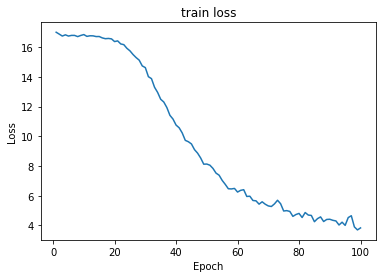

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(e, pltloss)
plt.title('train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('seed'+'train_loss.png')
                   

### Test loss plot

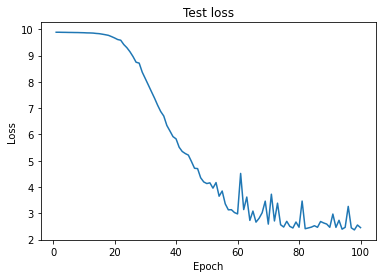

In [35]:
plt.figure()
plt.plot(e, test_pltloss)
plt.title('Test loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('seed'+'test_loss.png')


### Accuracy of training and testing datasets

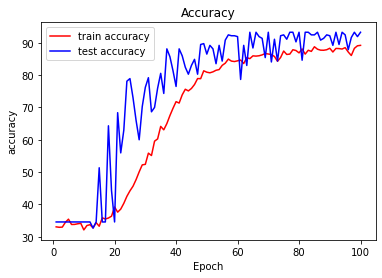

In [54]:
plt.figure()
plt.plot(e, plttrain_accuracy, label= 'train accuracy', color = 'red')
plt.plot(e, plttest_accuracy, label= 'test accuracy', color = 'blue')
plt.legend()
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.savefig('seed'+'accuracy.png')



### Confusion matrix of training (Label) 0: sad, 1: neutral, 2: happy

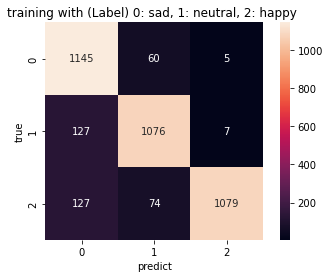

In [56]:
import seaborn as sns
plt.figure()
c = confusion_matrix(label_eval, class_eval)
sns.heatmap(c, annot = True, fmt = 'g', square = True)
plt.title("training with (Label) 0: sad, 1: neutral, 2: happy ")
plt.xlabel("predict")
plt.ylabel("true")

plt.savefig('seed'+'train_cm.png')


### Confusion matrix of testing (Label) 0: sad, 1: neutral, 2: happy

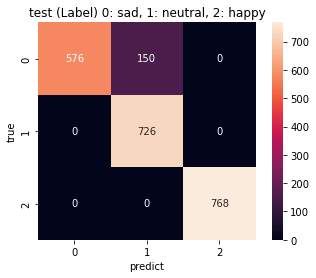

In [57]:
plt.figure()
cx = confusion_matrix(label_t_eval, class_t_eval)
sns.heatmap(cx, annot = True, fmt = 'g', square = True)
plt.title("test (Label) 0: sad, 1: neutral, 2: happy")
plt.xlabel("predict")
plt.ylabel("true")
plt.savefig('seed'+'test_cm.png')



# BILSTM MODEL

In [39]:
class LSTM(nn.Module):
    '''
    Expected Input Shape: (batch, seq_len, channels)
    '''
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, bidirectional=bidirectional, 
                            dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * num_layers, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # Set initial hidden and cell states
        #*2 because it's bidirectional
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device).float()
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device).float()
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0)) # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :]) 
        out = self.softmax(out)

        return out

### Hyperparameter and defining model

In [40]:
input_dim = 310
hidden_dim=150
num_layers=2
num_classes=3
bidirectional = True
dropout = 0.5
batch_size=256
#LSTM
model_lstm = LSTM(input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout)
model_lstm = model_lstm.float() #define precision as float to reduce running time


### optimizer and loss function

In [41]:
import torch.optim as optim

learning_rate = 0.01

optimizer = optim.Adam(model_lstm.parameters())
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=learning_rate)

### Put them into GPU if possible

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Configured device: ", device)

Configured device:  cuda


In [43]:
model = model_lstm.to(device)
criterion = criterion.to(device)

In [44]:
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

### Define the training process. We set model.train() so dropout is applied.

In [45]:
def train(model, iterator, optimizer, criterion):
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for i, (X_train, Y_train) in enumerate(train_loader):
        
        
        #Move tensors to the configured device
        X_train = X_train.to(device)
        Y_train = Y_train.to(device).long()
        
        #Forward pass
        outputs = model(X_train.float())
        loss = criterion(outputs, Y_train)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        #check accuracy
        predictions = model(X_train.float())
        _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
        total += Y_train.size(0)  #keep track of total
        correct += (predicted == Y_train).sum().item()  #.item() give the raw number
        acc = 100 * (correct / total)
                
        epoch_loss += loss.item()
        epoch_acc = acc
        
    return epoch_loss / len(iterator), epoch_acc

### Testing process. We define a function for testing our model. We wet model.eval() since we do not use dropout.

In [46]:
def evaluate(model, iterator, criterion):
    
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for i, (X_test, Y_test) in enumerate(test_loader):
            
            #Move tensors to the configured device
            X_test = X_test.to(device)
            Y_test = Y_test.to(device).long()

            predictions = model(X_test.float())
            loss = criterion(predictions, Y_test)

            _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
            total += Y_test.size(0)  #keep track of total
            correct += (predicted == Y_test).sum().item()  #.item() give the raw number
            acc = 100 * (correct / total)
            
            epoch_loss += loss.item()
            epoch_acc = acc
        
    return epoch_loss / len(iterator), epoch_acc

### We will also define a time function useful for calculating time

In [47]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### Train our model.

In [48]:
N_EPOCHS = 100

best_valid_loss = float('inf')
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []


print(f"Training {type(model).__name__}")
    
start_time = time.time()

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, test_loader, criterion)

    end_time = time.time()
    #for plotting
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if (epoch+1) % 5 == 0:
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        

Training LSTM
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.843 | Train Acc: 56.86%
	 Val. Loss: 0.717 |  Val. Acc: 62.70%
Epoch: 10 | Epoch Time: 0m 0s
	Train Loss: 0.607 | Train Acc: 70.95%
	 Val. Loss: 0.561 |  Val. Acc: 76.22%
Epoch: 15 | Epoch Time: 0m 0s
	Train Loss: 0.369 | Train Acc: 85.43%
	 Val. Loss: 0.496 |  Val. Acc: 82.43%
Epoch: 20 | Epoch Time: 0m 0s
	Train Loss: 0.247 | Train Acc: 91.62%
	 Val. Loss: 0.327 |  Val. Acc: 88.65%
Epoch: 25 | Epoch Time: 0m 0s
	Train Loss: 0.195 | Train Acc: 93.54%
	 Val. Loss: 0.339 |  Val. Acc: 87.84%
Epoch: 30 | Epoch Time: 0m 0s
	Train Loss: 0.276 | Train Acc: 90.70%
	 Val. Loss: 0.637 |  Val. Acc: 76.49%
Epoch: 35 | Epoch Time: 0m 0s
	Train Loss: 0.208 | Train Acc: 93.24%
	 Val. Loss: 0.326 |  Val. Acc: 92.16%
Epoch: 40 | Epoch Time: 0m 0s
	Train Loss: 0.120 | Train Acc: 96.43%
	 Val. Loss: 0.731 |  Val. Acc: 74.32%
Epoch: 45 | Epoch Time: 0m 0s
	Train Loss: 0.100 | Train Acc: 97.00%
	 Val. Loss: 0.305 |  Val. Acc: 92.43%
Epoch: 50 | Ep

### Training and Testing loss

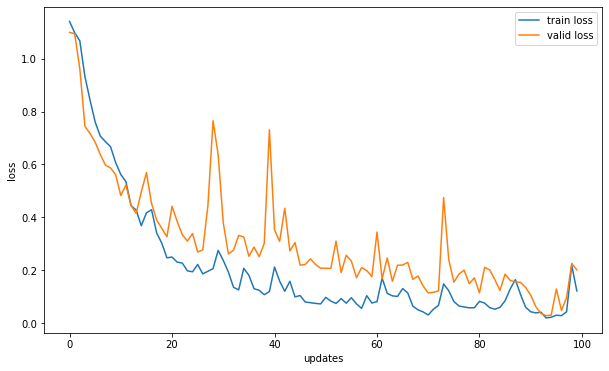

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')
plt.savefig('seed_lstm'+'train_test.png')


### Treaining and Testing Accuracy

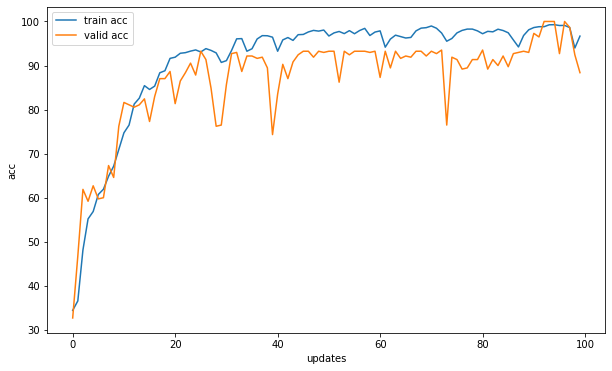

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_accs, label = 'train acc')
ax.plot(valid_accs, label = 'valid acc')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('acc')
plt.savefig('seed_lstm'+'train_test_accuracy.png')
